# Test: gc_50_3

In [12]:
from cp_graph_colouring import cp_search_prune as cp, input
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd

In [6]:
file_path = "./cp_graph_colouring/data/gc_50_1"
edges, nodes, edge_count, node_count, g = input.input_data(file_path)

In [9]:
nodes_df = input.get_node_data(g, nodes) 
nodes_df.head()

,node_id,pr,degree,used_domain_size
0,0,0.018599,5,0
1,1,0.012865,3,0
2,2,0.026127,7,0
3,3,0.021104,6,0
4,4,0.017136,4,0


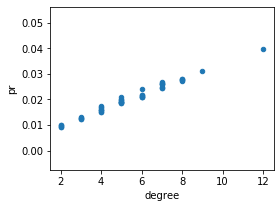

In [13]:
nodes_df.plot.scatter(x="degree", y="pr", figsize=(4,3))
plt.show()

In [14]:
solution = [-1] * node_count

In [15]:
domain, colours_bank = cp.create_domain(max_number_of_colours=10, node_count=node_count)

In [16]:
colours_bank_srt = sorted(colours_bank, key= lambda x: x[1], reverse=True)

In [18]:
solution, colours_bank, domain, report_df= \
    cp.dynamic_search(g=g, nodes_df=nodes_df,
                   domain=domain, solution=solution, colours_bank=colours_bank,
                   param_dyn_search=0.2, dev= False)

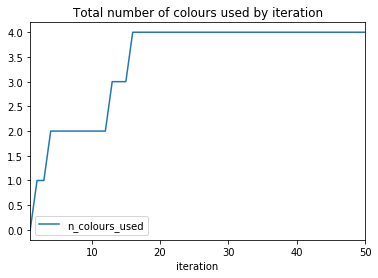

In [20]:
report_df.plot(y="n_colours_used", x="iteration")
plt.title("Total number of colours used by iteration")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


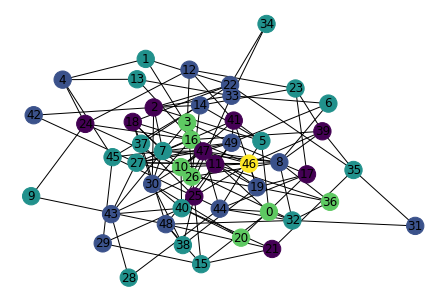

In [26]:
cp.draw_graph(node_count, edges, solution)